## The Iris Dataset - Analysis

    Exploratory Data Ananlysis of the popular dataset. 
    
    This is an univariate data analysis - meaning, our ultimate aim is to be able to correctly identify the specie of Iris flower given it’s features — sepal length, sepal width, petal length and petal width.
    
[Dataset Link](https://archive.ics.uci.edu/ml/datasets/Iris)

[Tutorial](https://medium.com/analytics-vidhya/exploratory-data-analysis-uni-variate-analysis-of-iris-data-set-690c87a5cd40)

[Good Practices for Jupyter Notebook](https://towardsdatascience.com/jupyter-notebook-best-practices-f430a6ba8c69)


#### **Import**

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./iris_dataset.csv", header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

#### **Analysis**

In [39]:
df.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                        mean median        mean median         mean median   
species                                                                      
Iris-setosa            5.006    5.0       3.428    3.4        1.462   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.246    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

For all the species, the respective values of the mean and median of it’s features are found to be pretty close. This indicates that data is nearly symmetrically distributed with very less presence of outliers. 
    
**Box plot is one of the best statistical tool used for outlier detection in the data.**

In [16]:
# Standard Deviation (or Variance) conveys how widely the data is spread about mean 

df.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,0.352490,0.379064,0.173664,0.105386
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


---

##### **Box Plot**

    Box plot, also known as a box and whisker plot, displays a summary of a large amount of data in five numbers — minimum, lower quartile(25th percentile), median(50th percentile), upper quartile(75th percentile) and maximum data values.

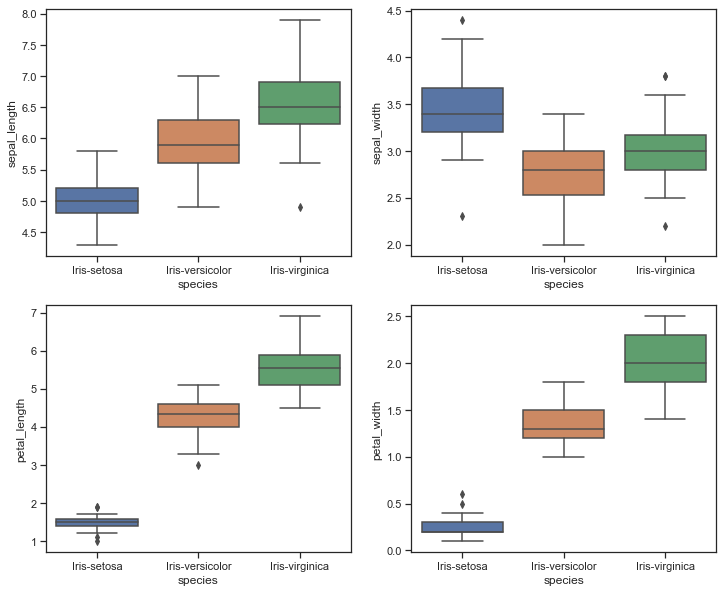

In [3]:
# Box Plot, also called box-whisker plot

sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width',data=df)
plt.show()

The isolated points that can be seen in the box-plots above are the outliers in the data. Since these are very few in number, it wouldn't have any significant impact on our analysis.

---

##### **Violin Plot**

    A violin plot plays a similar role as a box and whisker plot. It shows the distribution of data across several levels of one (or more) categorical variables(flower species in our case) such that those distributions can be compared.
    
    Unlike box plot, in which all of the plot components correspond to actual data points, the violin plot additionally shows the kernel density estimation of the underlying distribution.

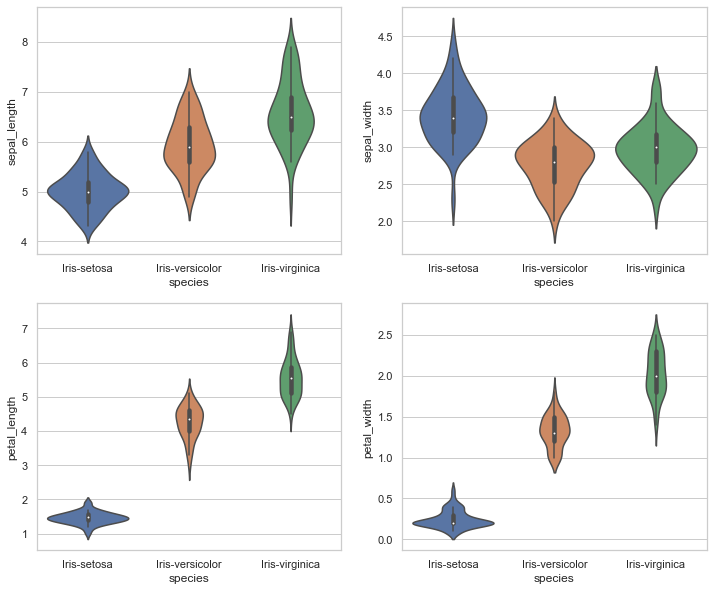

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=df)
plt.show()

Violin plots typically are more informative as compared to the box plots as violin plots also represent the underlying distribution of the data in addition to the statistical summary.

___



##### **Probability Distribution Function (PDF)**

    Which among the four features is more useful than other variables in order to distinguish between the species of Iris flower ? To answer this, we will plot the probability density function(PDF) with each feature as a variable on X-axis and it’s histogram and corresponding kernel density plot on Y-axis.

In [37]:
# Let's start by splitting it into three separate dataframes.

iris_setosa = df[df["species"] == "Iris-setosa"]
iris_versicolor = df[df["species"] == "Iris-versicolor"]
iris_virginica = df[df["species"] == "Iris-virginica"]

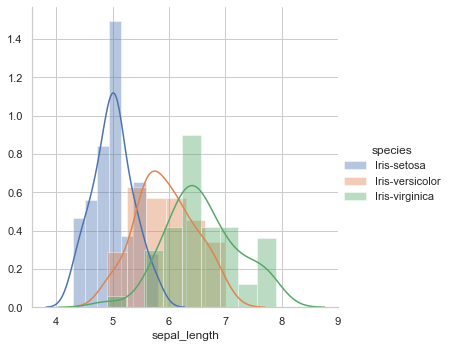

In [23]:
# Plot 1 - Classification feature : Sepal Length
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();

plt.show()

# All lengths are in centimeters.

**Plot 1 - Classification feature : Sepal Length**

The density plot **Plot 1** reveals that there is a significant amount of overlap between the species on sepal length, so it wouldn’t be a good idea to consider sepal length as a distinctive feature in our uni-variate analysis.

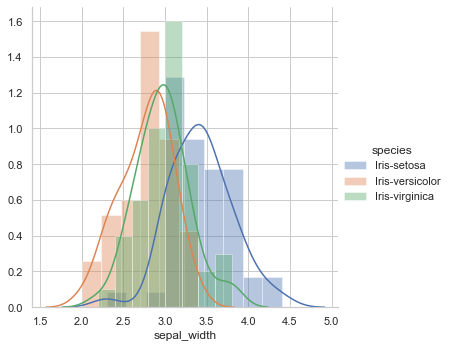

In [24]:
# Plot 2 - Classification feature : Sepal Width
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();

plt.show()

**Plot 2 - Classification feature : Sepal Width**

In density plot **Plot 2** the overlap is even more than sepal length as seen in Plot 1 above. The spread of the data is also high. So, again we cannot make any comment on the specie of the flower given it’s sepal width only.

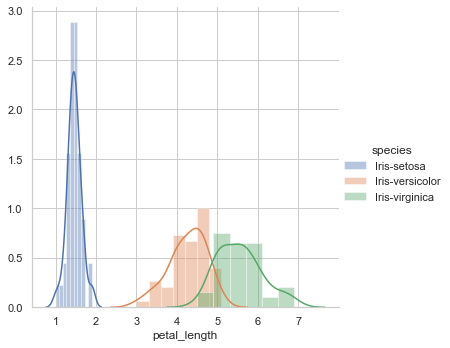

In [25]:
# Plot 3 - Classification feature : Petal Length
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();

plt.show()

**Plot 3 - Classification feature : Petal Length**

In density plot **Plot 3** looks promising from the point of view of uni-variate classification. The Setosa species are well separated from Versicolor and Virginica, although there is some overlap between the Versicolor and Virginica, but not as bad as the the above two plots.

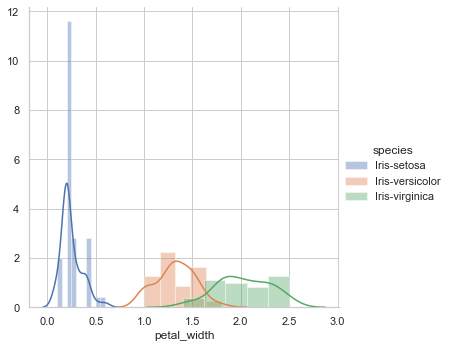

In [26]:
# Plot 4 - Classification feature : Petal Width
sns.FacetGrid(df, hue="species", height=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();

plt.show()

**Plot 4 - Classification feature : Petal Width**

In density plot **Plot 4** looks good. There is slight intersection between the Setosa and Versicolor species, while the overlap between the Versicolor and Virginica is somewhat similar to that of petal length(Plot 3).

    To summarize, if we have to choose one feature for classification, we will pick petal length (Plot 3) to distinguish among the species. If we have to select two features, then we will choose petal width as the second feature, but then again it would be a wiser to look at pair-plots(bi-variate and multivariate analysis) to determine which two features are most useful in classification.

We have already established above how petal length could stand out as an useful metric to differentiate between the species of Iris flower. From our preliminary investigation, below pseudo-code can be constructed —
(Note that this estimation is based on the kernel density smoothed probability distribution plots obtained from histograms)

```
If petal_length < 2.1
then specie = ‘Setosa’

else if petal_length > 2.1 and petal_length < 4.8
then specie = ‘Versicolor’

else if petal_length > 4.8
then specie = ‘Virginica’

```

All lengths in centimeters.

    Although the Setosa is clearly separated, there is a small overlap between the Versicolor and Virginica species.

    The reason why we intuitively considered 4.8 mark to distinguish between Virginica and Versicolor is because from the density plot we can clearly see that although not all, but majority of the Versicolor flowers has petal length less than 4.8 while majority of the Virginica flowers has petal length greater than 4.8.
    
    With this preliminary analysis, it is quiet possible that some Versicolor flowers who’s petal length is greater than 4.8 will get incorrectly classified as Virginica. Similarly, some Virginica flowers who’s petal length happen to be less than 4.8 will get incorrectly classified as Versicolor.
    
    Is there some way to measure what proportion or what percentage of Versicolor and Virginica flowers will be incorrectly classified with above analysis ? That’s where Cumulative distribution plots comes into the picture!

##### **Cumulative Distribution Function (CDF)**

    The area under the plot of PDF over an interval represents the probability of of occurrence of random variable in that interval. In our analysis, petal length is the random variable.
    
    Mathematically, CDF is an integral of PDF over the range of values that a continuous random variable takes. CDF of a random variable evaluated at any point ‘x’ gives the probability that a random variable will take a value less than or equal to ‘x’.

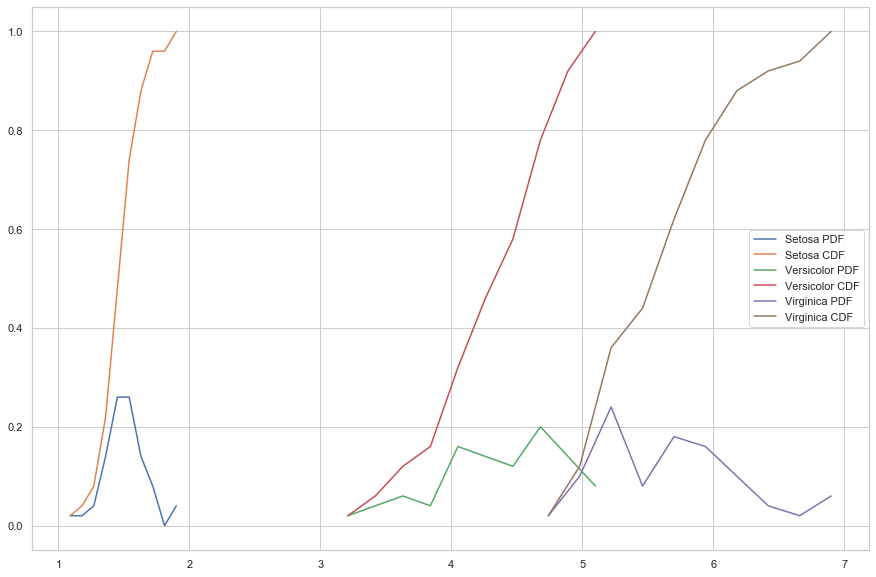

In [41]:
# Plotting CDF and PDF for IRIS Setosa, Versicolor and Virginica flowers for comparative analysis of the petal length

plt.figure(figsize=(15,10))
counts, bin_edges = np.histogram(iris_setosa['petal_length'],
                                 bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Setosa PDF')
plt.plot(bin_edges[1:], cdf, label = 'Setosa CDF')
counts, bin_edges = np.histogram(iris_versicolor['petal_length'],
                                 bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Versicolor PDF')
plt.plot(bin_edges[1:], cdf, label = 'Versicolor CDF')
counts, bin_edges = np.histogram(iris_virginica['petal_length'],
                                 bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Virginica PDF')
plt.plot(bin_edges[1:], cdf, label = 'Virginica CDF')
plt.legend()
plt.show()

    From the above CDF plots, it can be seen that 100 % of the Setosa flower species have petal length less than 1.9. Near about 95 % of the Versicolor flowers have petal length less than 5, while about 10% of the Virginica flowers have petal length less than 5. So, we will incorporate our newly found insights into our previously written pseudo-code to construct a simple uni-variate ‘classification model’.

** Hence, the pseudo code for our final classification model is - **

```
        If petal_length < 1.9
        then species = ‘Setosa’
        (accuracy = 100%)
        
        else if petal_length > 3.2 and petal_length < 5
        then species = ‘Versicolor’
        (accuracy = 95%)
        
        else if petal_length > 5
        then species = ‘Virginica’
        (accuracy = 90%)
```